In [3]:
#Import all the needed packages for this exercises
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
#from seaborn import plt
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score

In [4]:
#Create Iris dataframe from load_iris dataset and neighbors
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
n_neighbors = range(1,75,1)

In [5]:
#Create Target column 
#fig, axes = plt.subplots(nrows=2, ncols=3)
iris_df['Target'] = iris.target

In [6]:
# Create the training (and test) set using scikit-learn's train_test_split function
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=12)

In [7]:
#Function for scores per neighbor
scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

I see that the more the neighbors, the lesser the classification rate, but the drop is very steep at 60 neighbors


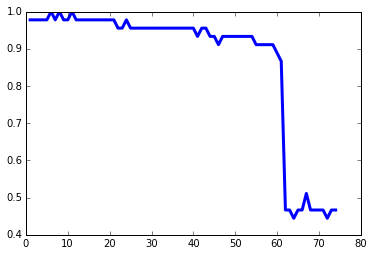

In [8]:
plt.plot(n_neighbors, scores, linewidth=3.0)
print "I see that the more the neighbors, the lesser the classification rate, but the drop is very steep at 60 neighbors"

In [9]:
from sklearn.datasets import load_iris
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

from sklearn.cross_validation import cross_val_score
clf = neighbors.KNeighborsClassifier(5, weights='uniform')
clf.fit(iris.data[:, 2:4], iris.target)
scores = cross_val_score(clf, iris_df.values, iris.target, cv=5)
print scores
print scores.mean()

[ 0.96666667  1.          0.93333333  0.96666667  1.        ]
0.973333333333


In [17]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
iris_shuffle = iris_df.reindex(np.random.permutation(iris_df.index))
iris_shuffle.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
25,5.0,3.0,1.6,0.2,0
127,6.1,3.0,4.9,1.8,2
19,5.1,3.8,1.5,0.3,0
70,5.9,3.2,4.8,1.8,1
117,7.7,3.8,6.7,2.2,2


In [19]:
from sklearn import neighbors
num_folds = 5  # 5 fold cross validation
rows_in_fold = len(iris_shuffle)/(num_folds)
n = 10  # Let's assume the num neighbors to be 10 for this case
scores = []
for k in np.arange(num_folds):
   test = iris_shuffle[int(rows_in_fold*k): int(rows_in_fold*(k +1))]
   train = iris_shuffle.drop(test.index)
   # Let's obtain the training and test datasets for model fitting
   X_test = test.ix[:,0:4]  # extracting test features
   Y_test = test.ix[:,4:5] # extracting test target
   X_train = train.ix[:,0:4] # extracting train features
   Y_train = train.ix[:,4:5]  # extracting train target
   clf = neighbors.KNeighborsClassifier(n)
   clf.fit(X_train,Y_train['target'].values)
   scores.append(clf.score(X_test, Y_test['target'].values))
print "Cross validation score is {}".format(np.mean(scores))

Cross validation score is 0.953333333333
